<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Несмещённость" data-toc-modified-id="Несмещённость-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Несмещённость</a></span></li><li><span><a href="#Состоятельность" data-toc-modified-id="Состоятельность-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Состоятельность</a></span></li><li><span><a href="#Эффективность" data-toc-modified-id="Эффективность-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Эффективность</a></span></li></ul></div>



#  Несмещённость

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истинному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.


In [45]:
import numpy as np
import pandas as pd

import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 80
%matplotlib inline

__Определение:__  Оценка $\hat{\theta}$ параметра $\theta$ называется __несмещённой,__ если $\mathbb{E} (\hat{\theta}) = \theta$.

**Пример (слоны)**

По данным Международного союза охраны природы, сегодня на земле осталось всего около  около 50 тыс. индийских слонов. Средний вес взрослого слона (мужская особь) составляет 4 тонны. Предположим, что вес слонов нормален, и стандартное отклонение составляет порядка 100 кг. Сгенерируем наших слонов нормальным распределением, а выборка пусть будет размера 10000 (нам же нужны только взрослые здоровые мальчики).

In [3]:
norm_rv = sps.norm(loc=4000, scale=100)

# вся генеральная совокупность 
x_elephant = norm_rv.rvs(size = 10**4)

real_mean = np.mean(x_elephant) # настоящее среднее
print(real_mean)

3998.567495721741


Есть несколько учёных, которые приехали в Индию и пытаются по выборке из 100 слонов понять истинное среднее их веса (для научной работы). Для этого они используют разные оценки

* Одэхингум уверен в правоте выборочного среднего: 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Пэпин делает поправку на то, что он находится в месте с благоприятными условиями, а остальные слоны могут недоедать:

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

* Апониви тоже немного коректирует прогноз:

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i \cdot \frac{(n+1)}{n} - \frac{n}{n + 1} \cdot 40.$$

Промоделируем те оценки, которые они могли бы получить, если бы приезжали 200 раз в Индию и делали свои измерения (то есть получим распределение оценки)

In [29]:
# Команда нам не подходит, так как она всю матрицу сделает без повторений
# np.random.choice(x_mamont, size=(n,m), replace=False)

n = 100
number_of_samples = 200

th_od = np.zeros(number_of_samples)
th_pe = np.zeros(number_of_samples)
th_ap = np.zeros(number_of_samples)

for i in range(number_of_samples):
    x_sample = np.random.choice(x_elephant, size=n, replace=False)
    x_mean = np.mean(x_sample)
    th_od[i] = x_mean
    th_pe[i] = x_mean - 4200/n
    th_ap[i] = x_mean * (n+1)/n - n/(n + 1) * 40 

In [30]:
th_od.shape

(200,)

In [31]:
# посмотрим на оценки E(\hat \theta)
np.mean(th_od), np.mean(th_pe), np.mean(th_ap)

(3998.811610414727, 3956.811610414727, 3999.1957661228344)

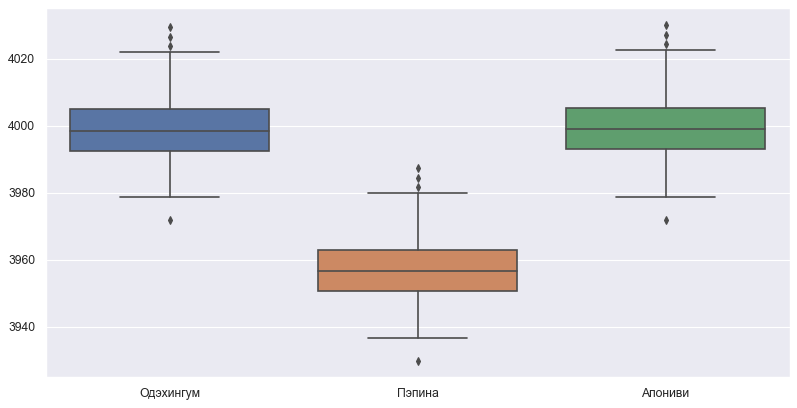

In [33]:
plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_od, th_pe, th_ap), columns = ['Одэхингум', 'Пэпина', 'Апониви'])
sns.boxplot(data = df,);

Хех. Cлоны. Детский сад. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

#  Состоятельность 


__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

__Учёные и их оценки:__

\begin{equation*}
\begin{aligned}
& \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i \\
& \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n} \\
& \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i \cdot\frac{ (n+1)}{n} \\
\end{aligned}
\end{equation*}

In [34]:
theta_hat_od = []
theta_hat_pe = []
theta_hat_ap = []


for n in range(100, 10000, 100): # поднимаемся выше и видим больше слонов
    
    # 50 выборок с повторениями (когда n=10000 это называется бутстреп)
    x_sample = np.random.choice(x_elephant, size = (n, 50))
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat_od.append(x_mean)               # состоятельная, несмещенная
    theta_hat_pe.append(x_mean - 4200/n)     # состоятельная, несмещенная ассимптотические
    theta_hat_ap.append(x_mean * (n+1)/n - n/(n + 1) * 40)   # несостоятельная, смещенная

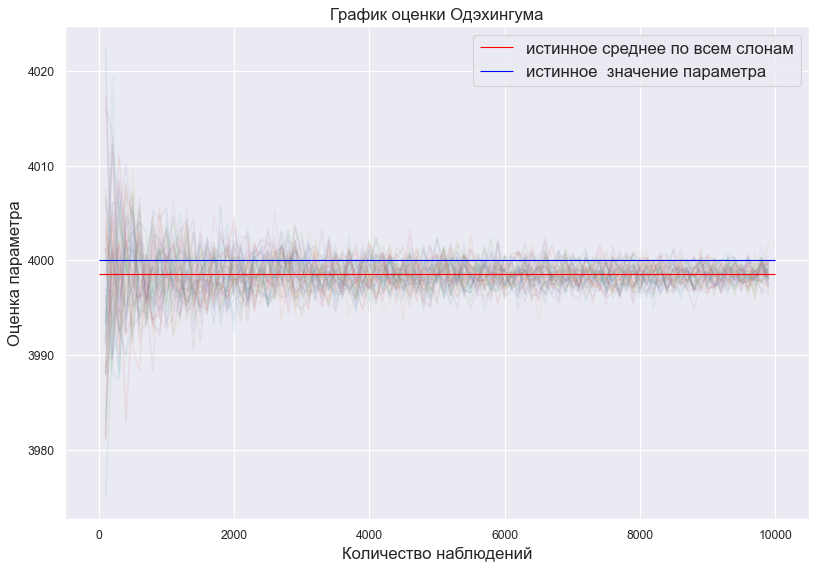

In [35]:
plt.figure(figsize=(12,8))
plt.title("График оценки Одэхингума", fontsize=15)
plt.plot(range(100, 10000, 100), theta_hat_od, alpha = 0.1)

plt.xlabel('Количество наблюдений', size=15)
plt.ylabel('Оценка параметра', size=15)

plt.hlines(real_mean, 0, 10000, color='red', lw=1, label='истинное среднее по всем слонам')
plt.hlines(4000, 0, 10000, color='blue', lw=1, label='истинное  значение параметра')
plt.legend(fontsize=15);

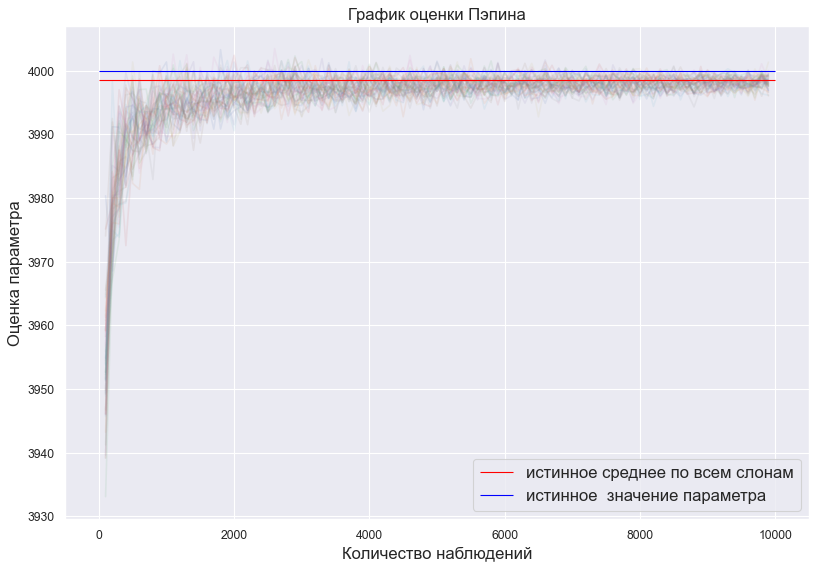

In [36]:
plt.figure(figsize=(12,8))
plt.title("График оценки Пэпина", fontsize=15)
plt.plot(range(100, 10000, 100), theta_hat_pe, alpha = 0.1)

plt.xlabel('Количество наблюдений', size=15)
plt.ylabel('Оценка параметра', size=15)

plt.hlines(real_mean, 0, 10000, color='red', lw=1, label='истинное среднее по всем слонам')
plt.hlines(4000, 0, 10000, color='blue', lw=1, label='истинное  значение параметра')
plt.legend(fontsize=15);

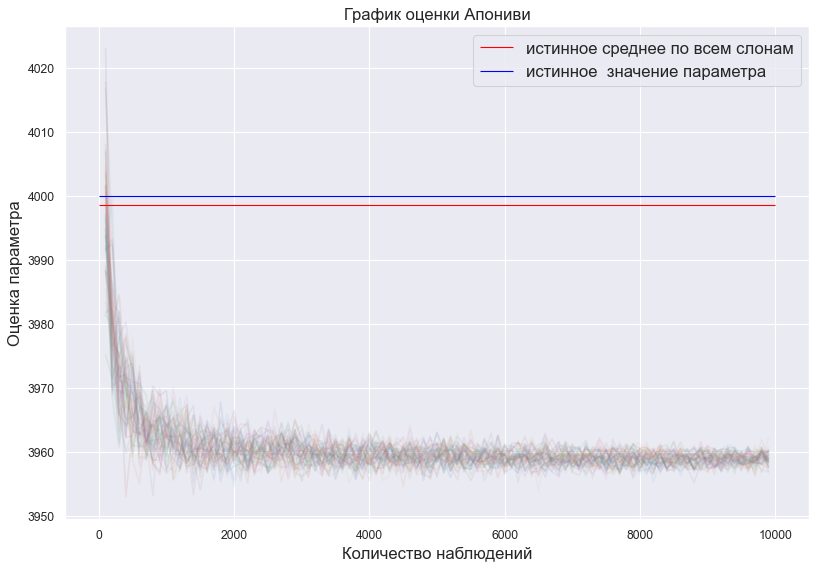

In [37]:
plt.figure(figsize=(12,8))
plt.title("График оценки Апониви", fontsize=15)
plt.plot(range(100, 10000, 100), theta_hat_ap, alpha = 0.1)

plt.xlabel('Количество наблюдений', size=15)
plt.ylabel('Оценка параметра', size=15)

plt.hlines(real_mean, 0, 10000, color='red', lw=1, label='истинное среднее по всем слонам')
plt.hlines(4000, 0, 10000, color='blue', lw=1, label='истинное  значение параметра')
plt.legend(fontsize=15);

__Ещё раз, ещё раз:__ нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 

##   Задание в зал:

У нас есть выборка $x_1, \ldots, x_n \sim \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами: 

$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_1 = (n+1) \cdot x_{min}$$

Проверьте эти оценки на состоятельность и несмещённость. 

# Эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

**Продолжим с оценками** $U[0; \theta]$



У нас есть выборка $x_1, \ldots, x_n \sim \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами: методом моментов и методом максимального правдоподобия: 


$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+1}{n} \cdot x_{max}$$

Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.  

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [38]:
uniform_rv = stats.uniform(0, 5)

In [39]:
n_obs = 100

# 1000 выборок размера n_obs
x = uniform_rv.rvs(size = (n_obs, 1000))
x.shape

(100, 1000)

In [40]:
# первая оценка 
theta_1 = 2*np.mean(x, axis=0)

# вторая оценка 
theta_2 = (n_obs + 1)/n_obs*np.max(x, axis=0)

In [41]:
theta_1.mean(), theta_2.mean()

(5.009871338904262, 5.000741926440202)

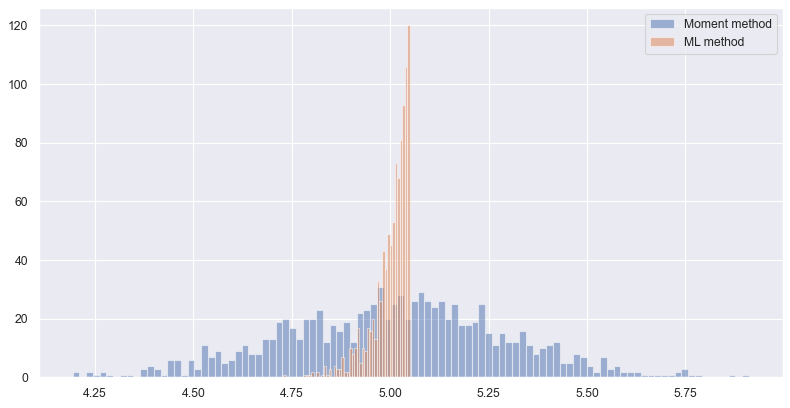

In [42]:
plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=100, alpha=0.5, label='Moment method')
plt.hist(theta_2, bins=50, alpha=0.5, label='ML method')
plt.legend();

Видим, что у оценки максимального правдоподобия разброс оказался меньше.  

In [43]:
np.var(theta_1)

0.08119747539108474

In [44]:
np.var(theta_2)

0.0022720273880831236

На практике следовало бы выбрать её. Когда у оценки самый маленький разброс в каком-то классе (например, в классе несмещённых оценок), её называют __эффективной__ в этом классе. 

Кстати говоря, для оценок из этого упражнения, можно руками выяснить, что: 

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}.$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией. Вывод этих формул руками можно посмотреть в [книге Черновой](https://nsu.ru/mmf/tvims/chernova/ms/ms_nsu07.pdf) на странице 33 (Пример 13).

##   Задание в зал:

Рассмотрим выборку из экспоненциального распределения $Exp(\theta)$. Для какого параметра $(\bar x)^2$ асимтотически нормальная оценка? Сравните оценки $(\bar x)^2$ и $\frac{\bar x^2}{2}$.